In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks, peak_prominences
import os
import analysis_lag as ana
from phil_ducial_points import detrend

In [40]:
messungen = [
    {
        "date": "2021_02_02",
        "dish": 1,
        "er": "./ATP Oscillation/2021_02_02_ATP20s_dish1_1_ER.csv",
        "cy": "./ATP Oscillation/2021_02_02_ATP20s_dish1_1_CY.csv"
    },{
        "dish": 2,
        "date": "2021_02_04",
        "er": "./ATP Oscillation/2021_02_04_ATP20s_dish2_2_ER.csv",
        "cy": "./ATP Oscillation/2021_02_04_ATP20s_dish2_2_CY.csv"
    },{
        "dish": 3,
        "date": "2021_02_04",
        "er": "./ATP Oscillation/2021_02_04_ATP20s_dish3_1_ER.csv",
        "cy": "./ATP Oscillation/2021_02_04_ATP20s_dish3_1_CY.csv"
    },{
        "dish": 4,
        "date": "2021_02_05",
        "er": "./ATP Oscillation/2021_02_05_ATP20s_dish4_1_ER.csv",
        "cy": "./ATP Oscillation/2021_02_05_ATP20s_dish4_1_CY.csv"
    },{
        "dish": 1,
        "date": "2021_03_01",
        "er": "./ATP Oscillation/2021_03_01_ATP20s_dish1_1_ER.csv",
        "cy": "./ATP Oscillation/2021_03_01_ATP20s_dish1_1_CY.csv"        
    }
]

In [51]:
messung = 3
er = ana.ReadData(directory=messungen[messung]["er"])
cy = ana.ReadData(directory=messungen[messung]["cy"])
analyse = ana.CellData(er=er, cy=cy)

C:\Users\emsch\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


6.013

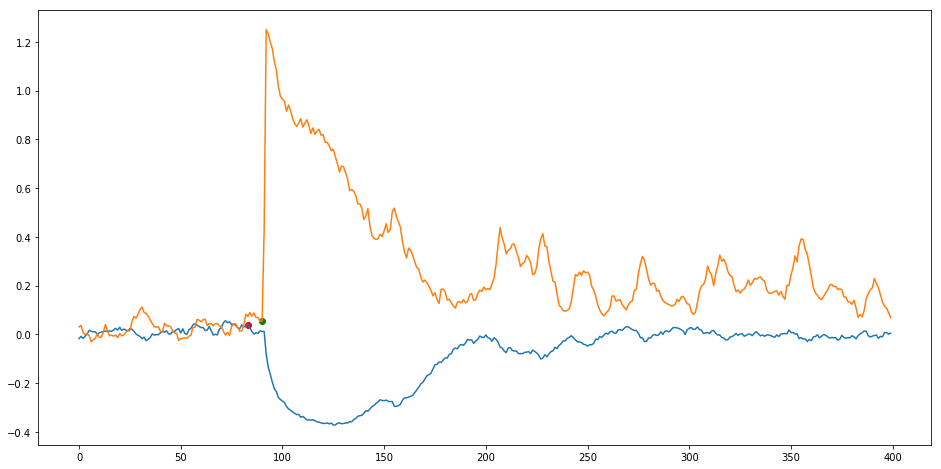

In [52]:
plt.figure(figsize=(16,8))
plt.plot(analyse.avg_signal_er)
plt.scatter(analyse.experiment_start_er, analyse.avg_signal_er[analyse.experiment_start_er], c="r")

plt.plot(analyse.avg_signal_cy)
plt.scatter(analyse.experiment_start_cy, analyse.avg_signal_cy[analyse.experiment_start_cy], c="g")

(analyse.experiment_start_cy - analyse.experiment_start_er)*0.859

during_after


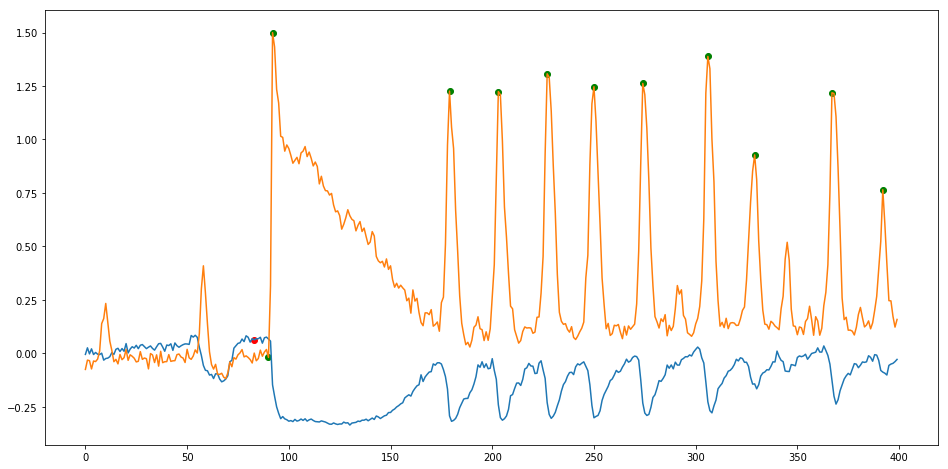

during_after


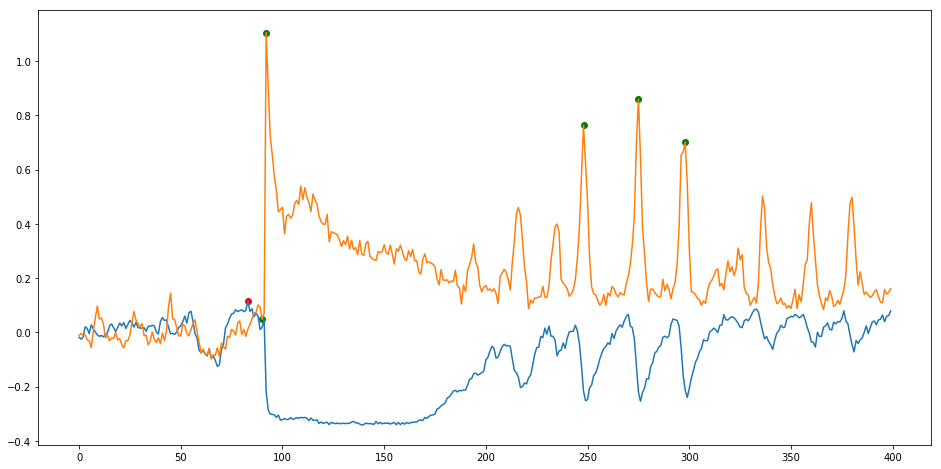

during_after


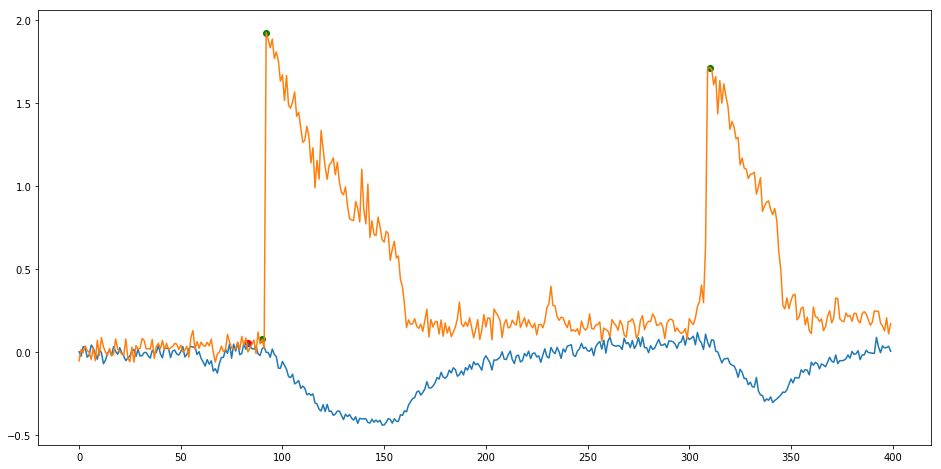

before_during_after


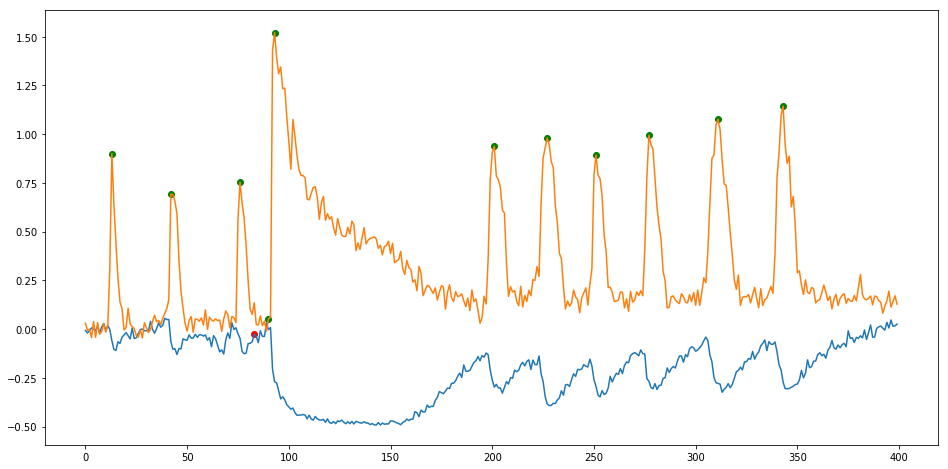

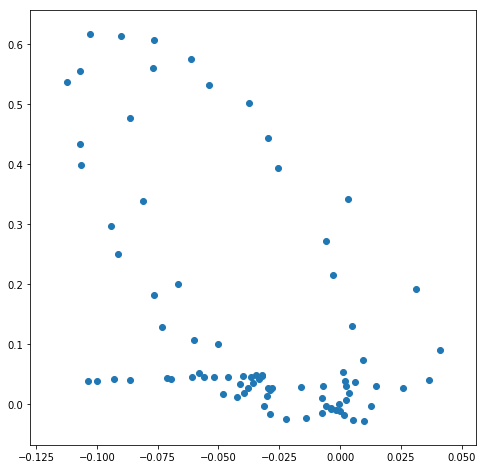

during_after


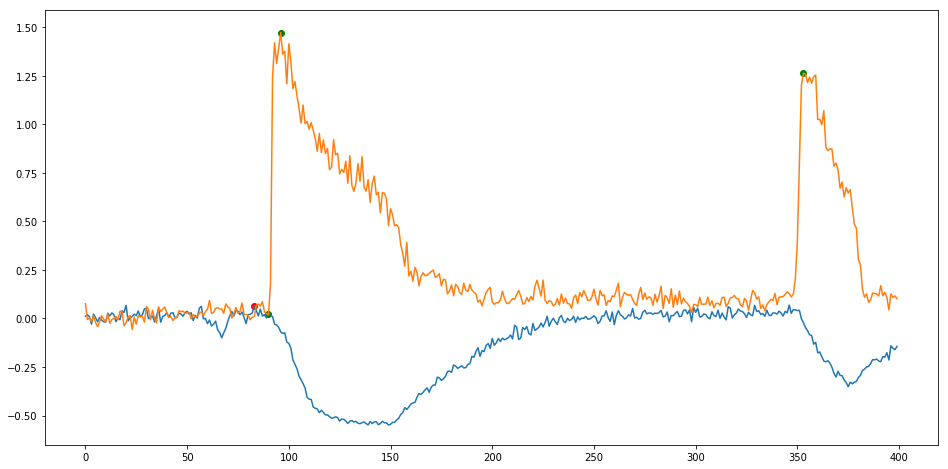

during


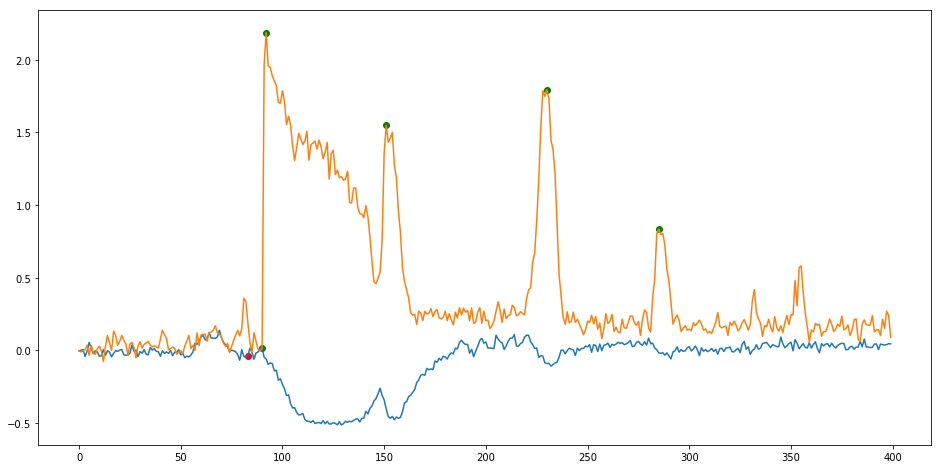

during_after


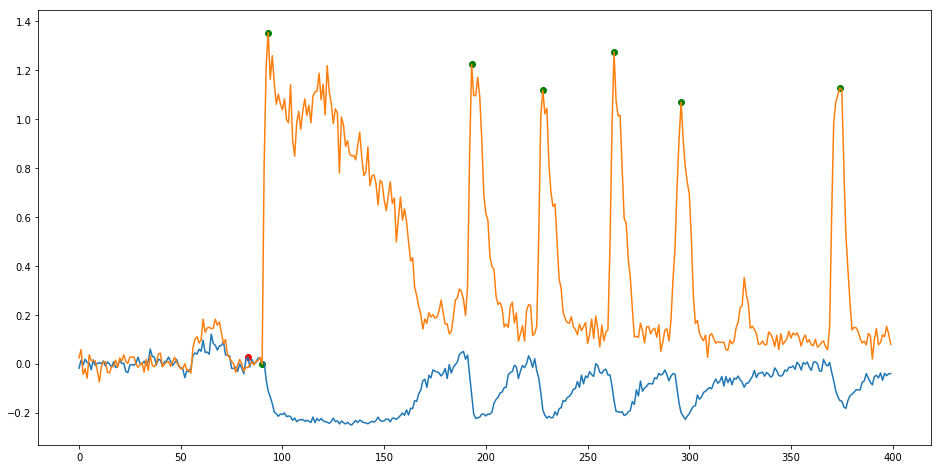

during_after


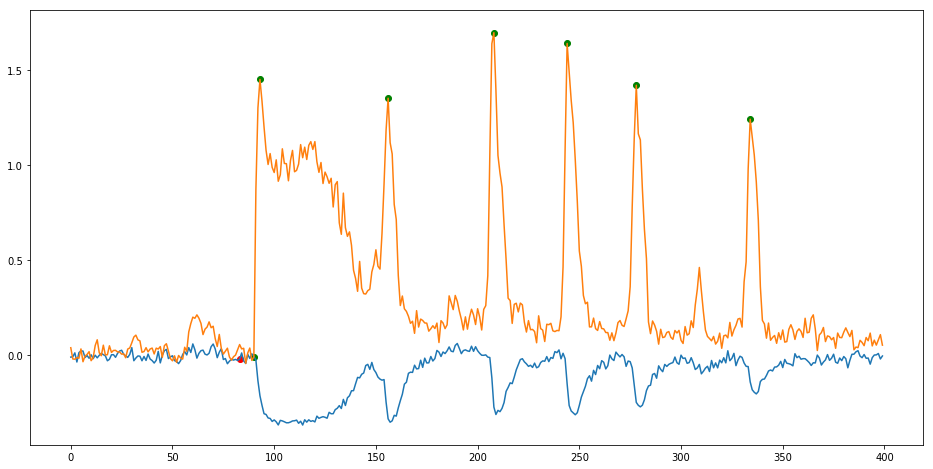

during


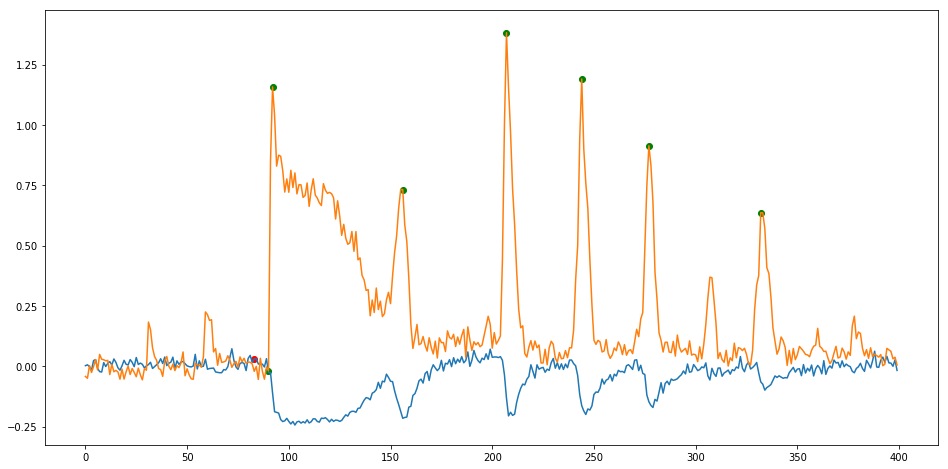

during


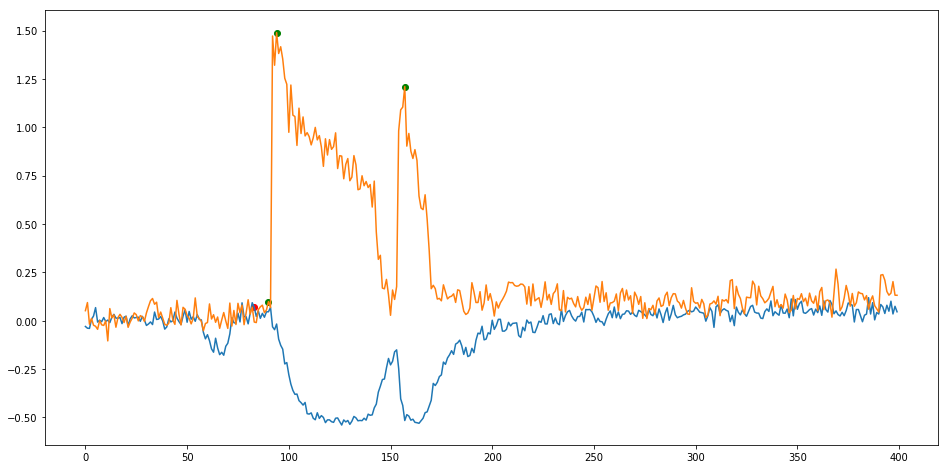

before_during_after


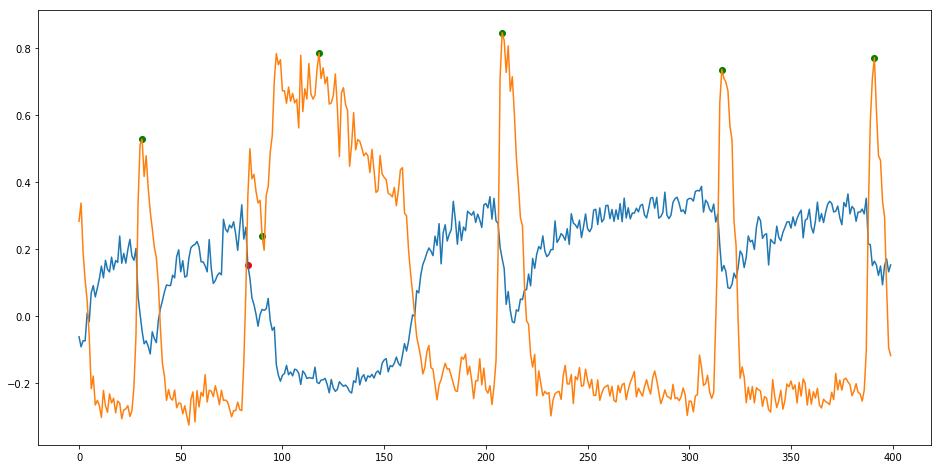

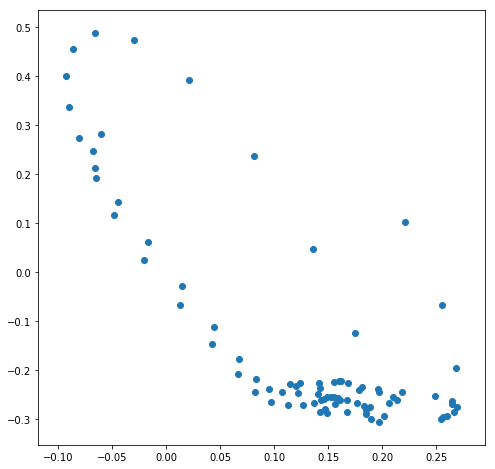

before_during_after


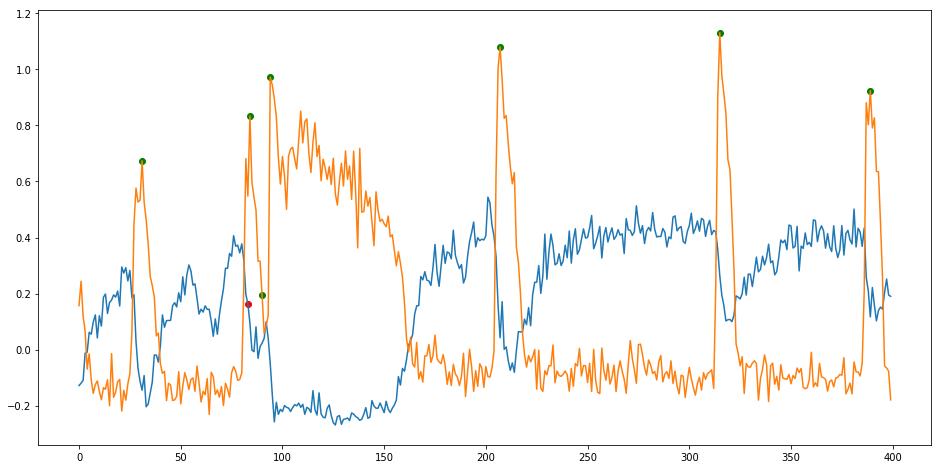

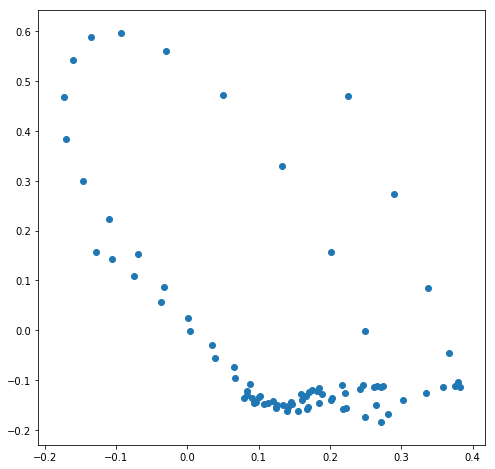

during_after


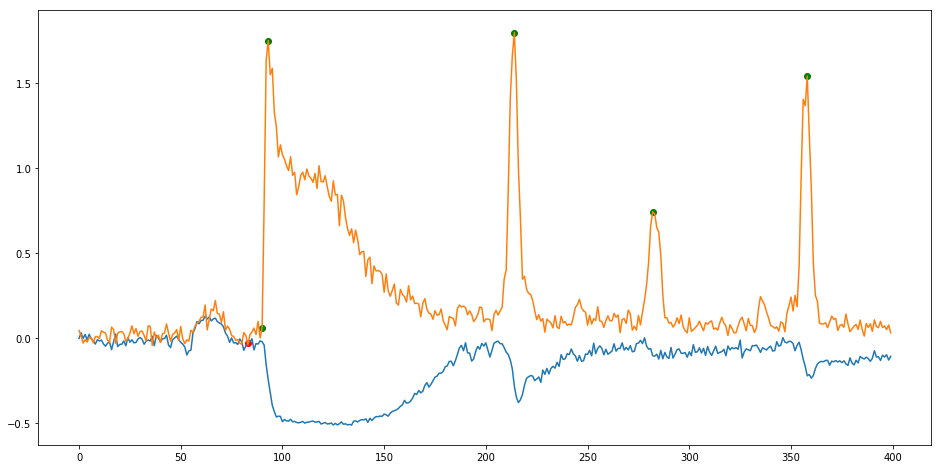

during_after


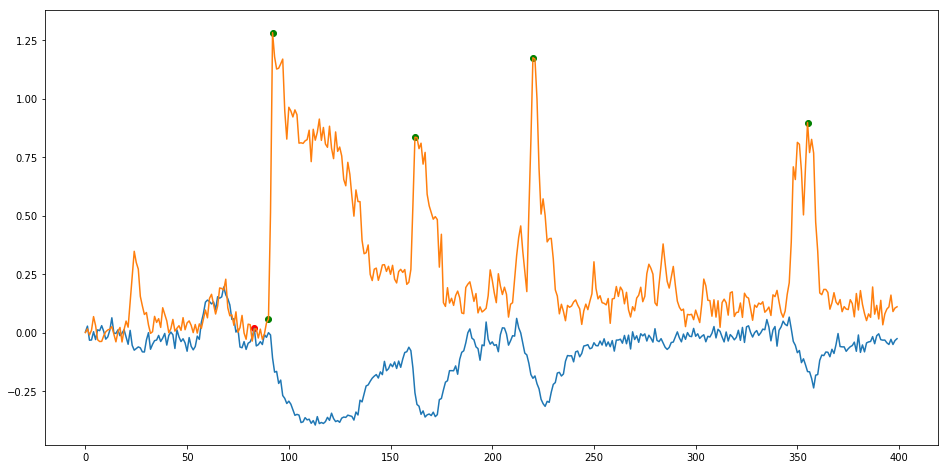

during_after


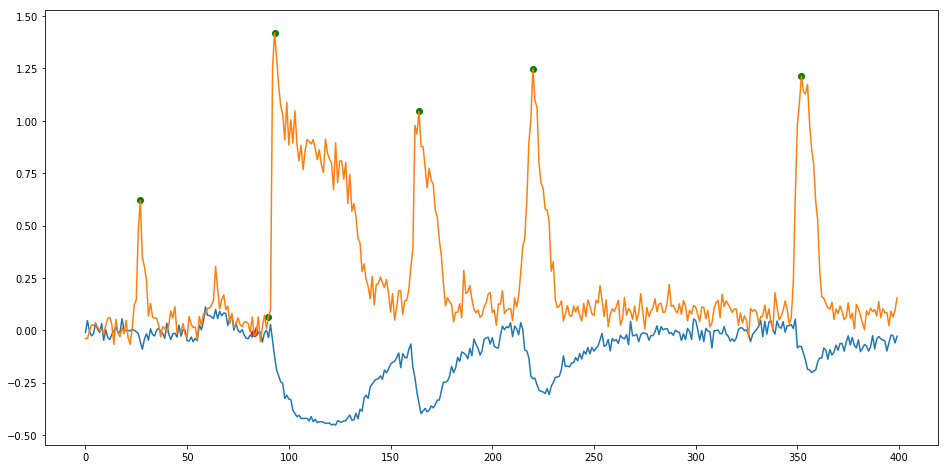

during_after


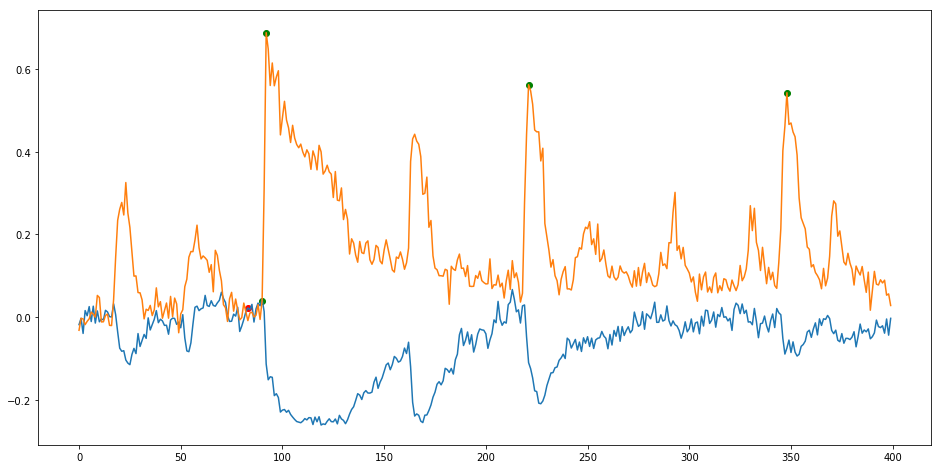

during_after


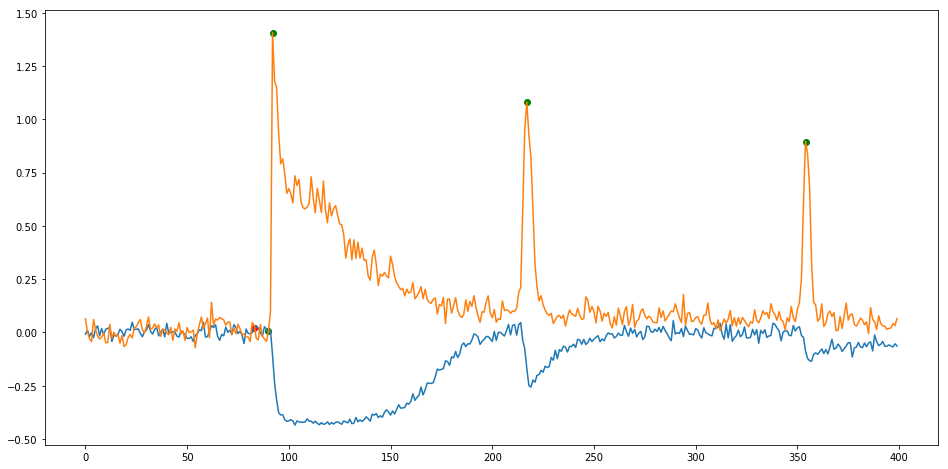

In [53]:
cells_no_oscillation_before = []
for cell in analyse.cells:

    #np.where((cell.cy.derivative>0)&(cell.cy.derivative>0))
    cell.get_oscillation_group(start_reaction=analyse.experiment_start_cy)
    print(cell.oscillation)
    
    if 'before' not in cell.oscillation:
        cells_no_oscillation_before.append(cell)
    
    peaks_cy, prominences = find_peaks(cell.cy.signal, prominence=0.5)
    #print(peaks_cy)
    
    plt.figure(figsize=(16,8))
    plt.plot(cell.er.signal)
    plt.plot(cell.cy.signal)
    
    plt.scatter(analyse.experiment_start_er, cell.er.signal[analyse.experiment_start_er], c="r")
    plt.scatter(analyse.experiment_start_cy, cell.cy.signal[analyse.experiment_start_cy], c="g")
    
    plt.scatter(peaks_cy, cell.cy.signal[peaks_cy], c="g")
    
    plt.show()
    
    if 'before' in cell.oscillation:
        plt.figure(figsize=(8,8))
        plt.scatter(cell.er.lowpass[:analyse.experiment_start_er], cell.cy.lowpass[:analyse.experiment_start_er])
        plt.show()

125
92


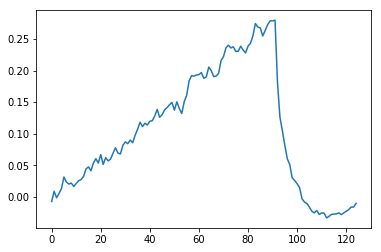

In [54]:
new_mean_er = np.mean([cell.er.signal for cell in cells_no_oscillation_before], axis=0)
new_mean_cy = np.mean([cell.cy.signal for cell in cells_no_oscillation_before], axis=0)

point_a = 0
point_b = np.argmin(new_mean_er)
#point_b = 158
experiment_start_er = np.argmax(detrend(new_mean_er[point_a:point_b]))
print(point_b)
plt.plot(detrend(new_mean_er[point_a:point_b]))

point_a = 0
point_b = np.argmax(new_mean_cy[:180])
print(point_b)
experiment_start_cy = np.argmin(detrend(new_mean_cy[point_a:point_b]))

-1.718

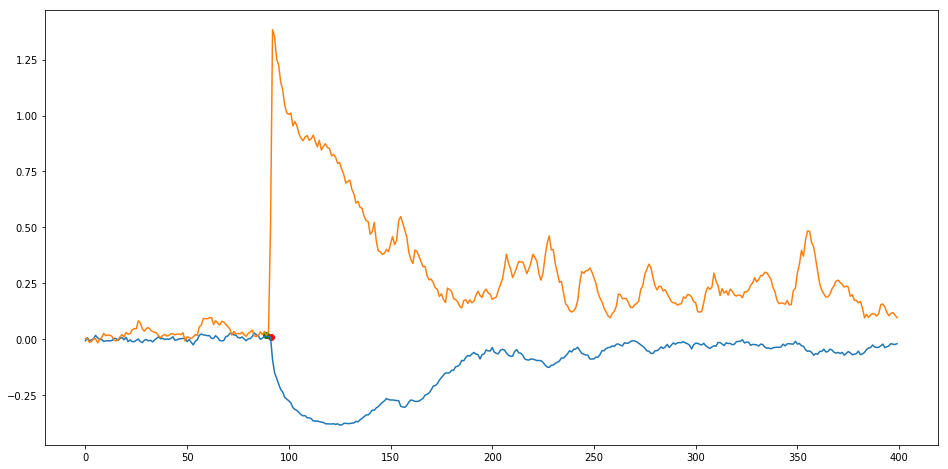

In [55]:
plt.figure(figsize=(16,8))
plt.plot(new_mean_er)
plt.scatter(experiment_start_er, new_mean_er[experiment_start_er], c="r")

plt.plot(new_mean_cy)
plt.scatter(experiment_start_cy, new_mean_cy[experiment_start_cy], c="g")

(experiment_start_cy - experiment_start_er)*0.859